<a href="https://colab.research.google.com/github/yohanesnuwara/climate-ambition/blob/master/carbon_capture_storage_to_meet_target.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Could We Possibly Reach the Target to Increase Number of CCUS Facilities a Hundredfold by 2040?

![Scottish CCS World Map](https://user-images.githubusercontent.com/51282928/72803316-5bb09100-3c80-11ea-9c67-13fab745d4a6.jpg)

In 2019, **International Energy Agency** (IEA) released a scenario in its World Energy Outlook, called the Sustainable Development Scenario (SDS), to highlight that CCUS contribute to 9% reduction of global CO<sub>2</sub> emission by 2050. This reduction is meant to reach 2015 Paris Agreement. IEA stated that to reach the 9% contribution, by 2050, **the mass of CO2 captured and permanently stored (captured CO<sub>2</sub> capacity) must reach 2.8 billion tonnes per annum**. In other words, a world institute for CCS, the **Global CCS Institute** further stated that to achieve the level outlined in the SDS, **number of CCUS facilities needs to increase a hundredfold by 2040**. 

To grasp the idea what a "hundredfold" means, take a look at this illustration.

Website [Scottish CCS](https://www.sccs.org.uk/expertise/global-ccs-map) has a **worldmap of CCS projects** distribution. There are 3 categories: **operational** (operating large-scale facilities), **in planning** (facilities soon to be operational), and **pilot project**. Each of these categories has been counted:

In [0]:
# current number of CCS projects: 20 operational, 55 in planning, 70 pilot

op = 20 
inplan = 55
pilot = 70

It is stated that CCS must increase a hundredfold. That means, by 2040, number of operational CCS facilities must be 100 times the number this year (2020), which means **20 facilities in 2020 grow to 2000 facilities in 2040**. There are **20 years** before 2040. We could draw a graph representing the growth of number of CCS facilities per year, assuming **the growth is linear**. 

(0, 2100)

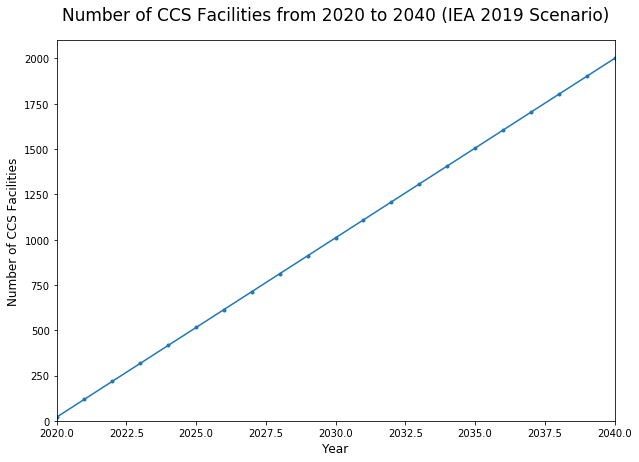

In [102]:
import numpy as np
import matplotlib.pyplot as plt

year = np.arange(2020, 2041, 1)
ccs_facilities_numbers = np.arange(20, 2020, 99)
plt.figure(figsize=(10, 7))
plt.title('Number of CCS Facilities from 2020 to 2040 (IEA 2019 Scenario)', size=17, pad=20)
plt.plot(year, ccs_facilities_numbers, '.-')
plt.xlabel('Year', size=12), plt.ylabel('Number of CCS Facilities', size=12)
plt.xlim(2020, 2040); plt.ylim(0, 2100)

It means **each year we have to add 99 new CCS facilities**. Well, is it possible and feasible? I think it's impossible. 

36.02000000000001

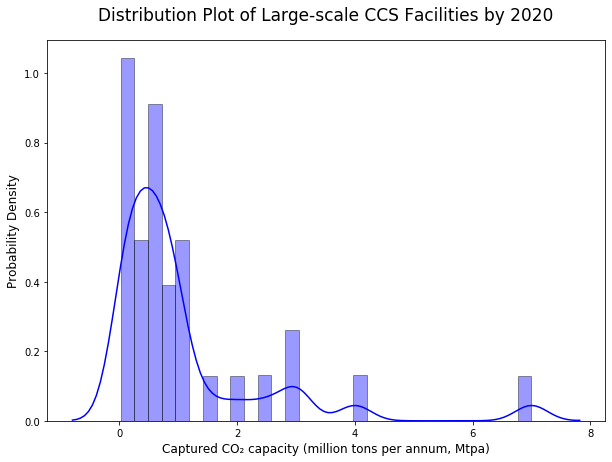

In [25]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

ccs = np.array([0.09, 3, 0.25, 1, 2.5, 7, 1.5, 0.4, 0.1, 0.85, 0.1, 0.7, 0.1, 0.5, 0.5, 0.6, 1, 0.4, 0.3, 3, 0.35, 1, 0.6, 0.8, 0.8, 0.7, 1, 2, 0.16, 0.1, 4, 0.02, 0.6])
plt.figure(figsize=(10, 7))
plt.title('Distribution Plot of Large-scale CCS Facilities by 2020', size=17, pad=20)
plt.xlabel('Captured CO\u2082 capacity (million tons per annum, Mtpa)', size=12), plt.ylabel('Probability Density', size=12)
sns.distplot(ccs, bins=30, color ='blue', hist_kws=dict(edgecolor="black", linewidth=1))
sum(ccs)

In [45]:
import scipy.stats as stats

stats.describe(ccs)

DescribeResult(nobs=33, minmax=(0.02, 7.0), mean=1.0915151515151515, variance=2.044225757575757, skewness=2.587665652812863, kurtosis=7.26087440274088)

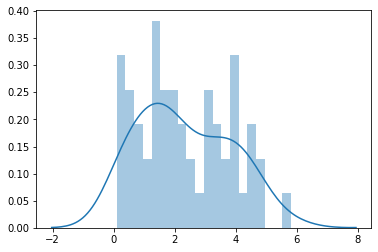

In [52]:
min = 0.02
max = 7
mode = stats.mode(ccs)
inplan = np.random.triangular(0.02, 0.1, 7, 55)
sns.distplot(inplan, bins=20)

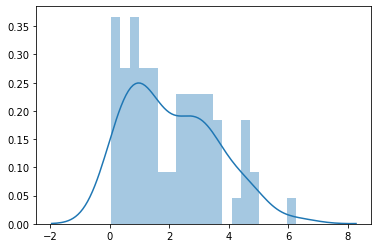

In [53]:
pilot = np.random.triangular(0.02, 0.1, 7, 70)
sns.distplot(pilot, bins=20)

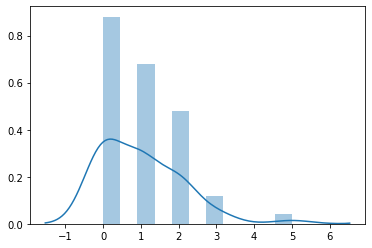

In [62]:
popul_inplan_sum = 55
n = 55
popul_inplan = np.random.multinomial(popul_inplan_sum, np.ones(n)/n, size=1)[0]
sns.distplot(popul_inplan, bins=11)

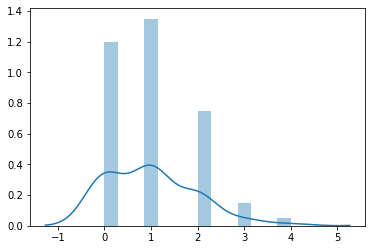

In [65]:
popul_pilot_sum = 70
n = 70
popul_pilot = np.random.multinomial(popul_pilot_sum, np.ones(n)/n, size=1)[0]
sns.distplot(popul_pilot, bins=14)

In [68]:
inplan_cap = popul_inplan * inplan
pilot_cap = popul_pilot * pilot
sum_inplan_cap = sum(inplan_cap)
sum_inplan_cap

116.66524488482062

# ***

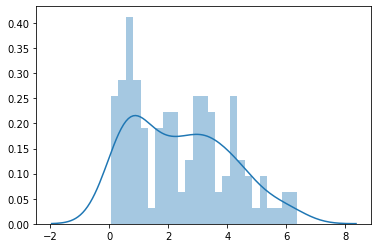

In [73]:
pilot = np.random.triangular(0.02, 0.1, 7, 125)
sns.distplot(pilot, bins=25)

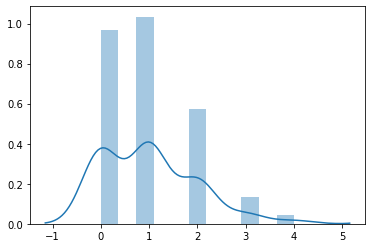

In [76]:
popul_inplan_sum = 125
n = 125
popul_inplan = np.random.multinomial(popul_inplan_sum, np.ones(n)/n, size=1)[0]
sns.distplot(popul_inplan, bins=11)

In [77]:
a = sum(pilot * popul_inplan_sum)
a

37730.61630597178

# Monte Carlo Simulation

1599019.8436526346

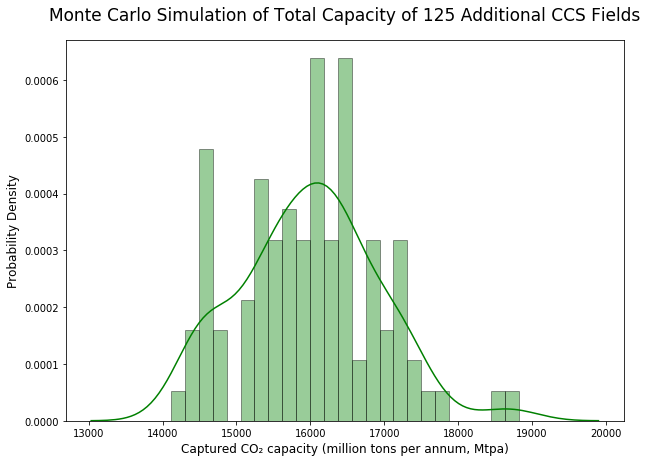

In [159]:
popul_inplan_sum = 75
n = 75

cap = []

for i in range(0, 100):
  pilot = np.random.triangular(0.02, 0.1, 5, 125)
  popul_inplan = np.random.multinomial(popul_inplan_sum, np.ones(n)/n, size=1)[0]
  summ = sum(pilot * popul_inplan_sum)
  cap.append(float(summ))

plt.figure(figsize=(10, 7))
plt.title('Monte Carlo Simulation of Total Capacity of 125 Additional CCS Fields', size=17, pad=20)
plt.xlabel('Captured CO\u2082 capacity (million tons per annum, Mtpa)', size=12), plt.ylabel('Probability Density', size=12)
sns.distplot(cap, bins=25, color ='green', hist_kws=dict(edgecolor="black", linewidth=1))
sum(cap)

# Rolling Dice

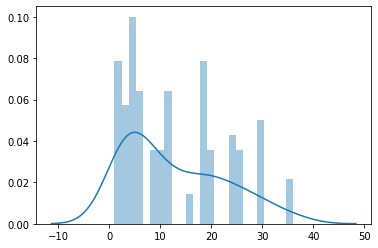

In [158]:
# generate random integer values
from random import seed
from random import randint

# generate the first 100 random numbers ranging from 1 to 6
record1 = []
for _ in range(100):
  value1 = randint(1, 6)
  record1.append(float(value1))

# generate the second 100 random numbers ranging from 1 to 6
record2 = []
for _ in range(100):
  value2 = randint(1, 6)
  record2.append(float(value2))

# multiply the two numbers
result = [record1*record2 for record1,record2 in zip(record1,record2)]
sns.distplot(result, bins=25)

In [145]:
for i in range(0, 100):
  record1 = []; record2 = []
  for _ in range(100):
    value1 = randint(1, 6)
    record1.append(float(value1))
    value2 = randint(1, 6)
    record2.append(float(value2))
    multiply = record1 * record2

TypeError: ignored

In [160]:
import pandas as pd

df = pd.DataFrame(cap)
df.describe(percentiles=[.10, .40, .60, .90]).T

,count,mean,std,min,10%,40%,50%,60%,90%,max
0,100.0,15990.198437,928.969528,14115.036994,14647.764622,15779.007604,16021.537007,16222.415256,17184.076817,18818.077176


# ***

In [31]:
target = 2800 #Mtpa
xyz = np.random.triangular(3, 4, 10, 100)
numbers = np.random.triangular(10, 25, 100, 100)
cap = xyz * numbers
sumcap = sum(cap)
sumcap

25652.343047075574

In [0]:
pilot = 70
inplan = 55
pil = np.random.triangular(3, 4, 55)


[ 4.89013831e-01  1.97240008e-01  7.61881816e-01  1.09855734e+00
  1.33630179e-01  7.59044871e-01  7.44675889e-01  4.92048338e-01
  2.00031027e-01  8.64891023e-01  7.65888729e-01  2.66474544e-01
  7.80981149e-01  7.83665762e-01  9.10937785e-01  1.34885045e-01
  7.77783479e-01  2.10140258e+00  2.06096627e+00  1.60810554e+00
  1.82008844e-01  4.43668665e-01  2.09368214e-01  7.87192875e-01
  1.09803125e+00 -1.85029087e-03  3.06585902e+00  4.39872753e-01
  4.13034378e+00  6.64217214e-01  4.07200611e+00  2.40041111e-02
  9.27127088e-01]


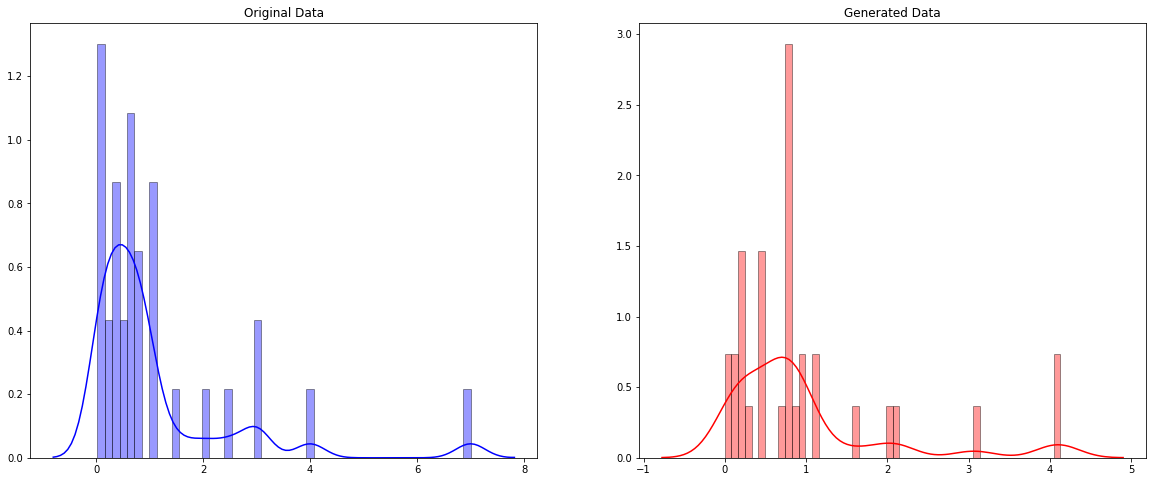

In [44]:
import numpy as np
import matplotlib.pyplot as plt

#import data
#conists of one column of datapoints as 2.231, -0.1516, 1.564, etc
data=np.array([0.09, 3, 0.25, 1, 2.5, 7, 1.5, 0.4, 0.1, 0.85, 0.1, 0.7, 0.1, 0.5, 0.5, 0.6, 1, 0.4, 0.3, 3, 0.35, 1, 0.6, 0.8, 0.8, 0.7, 1, 2, 0.16, 0.1, 4, 0.02, 0.6])
# data=uniform

#normalized histogram of loaded datase
hist, bins = np.histogram(data,bins=100,range=(np.min(data),np.max(data)) ,density=True)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2


#generate data with double random()
generatedData=np.zeros(33)
maxData=np.max(data)
minData=np.min(data)
i=0
while i<33:
    randNo=np.random.rand(1)*(maxData-minData)-np.absolute(minData)
    if np.random.rand(1)<=hist[np.argmax(randNo<(center+(bins[1] - bins[0])/2))-1]:
        generatedData[i]=randNo
        i+=1

#normalized histogram of generatedData
hist2, bins2 = np.histogram(generatedData,bins=100,range=(np.min(data),np.max(data)), density=True)
width2 = 0.7 * (bins2[1] - bins2[0])
center2 = (bins2[:-1] + bins2[1:]) / 2

#plot both histograms
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Original Data")
sns.distplot(data, bins=50, color ='blue', hist_kws=dict(edgecolor="black", linewidth=1))
plt.subplot(1,2,2)
plt.title("Generated Data")
sns.distplot(generatedData, bins=50, color ='red', hist_kws=dict(edgecolor="black", linewidth=1))

print(generatedData)

In [0]:
import scipy
n = 100; p = 1
k = np.arange(0, 33)
binomial = scipy.stats.binom.pmf(k, n, p)

# plt.plot(k, binomial)
sns.distplot(binomial)

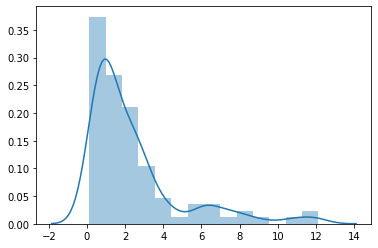

In [41]:
lognormal = np.random.lognormal(0.3, 1, 100)
sns.distplot(lognormal)